In [149]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [150]:
import os
print(os.getcwd())

c:\Users\Mariya\team6-project\jupiter_notebooks


In [151]:
#Loading data from local folder
df_train_set = pd.read_csv("Training.csv")
df_test_set = pd.read_csv("Testing.csv")

In [152]:
df_train_set.info()
df_train_set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [153]:
df_test_set.info()
df_test_set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [154]:

column_sum_train = df_train_set.sum()
any_zero_column_train_sum = (df_train_set.sum() == 0).any()
columns_with_zero_sum_train = column_sum_train[column_sum_train == 0].index.tolist()
any_zero_sum_train = len(columns_with_zero_sum_train) > 0

print("Any column sum is zero:", any_zero_sum_train)
print("Columns with sum zero:", columns_with_zero_sum_train)

print()
print()
column_sum_test = df_test_set.sum()
any_zero_column_test_sum = (df_test_set.sum() == 0).any()
columns_with_zero_sum_test = column_sum_test[column_sum_test == 0].index.tolist()
any_zero_sum_test = len(columns_with_zero_sum_test) > 0

print("Any column sum is zero:", any_zero_sum_test)
print("Columns with sum zero:", columns_with_zero_sum_test)


Any column sum is zero: True
Columns with sum zero: ['fluid_overload', 'Unnamed: 133']


Any column sum is zero: True
Columns with sum zero: ['fluid_overload']


In [155]:
#Based on information above Unnamed 133 is an extra column in the test dataset whcih we want to remove. 
# Note column 'fluid_overload' has all symptoms = 0, so this can be potentially another column to drop later

df_train_set = df_train_set.drop(['Unnamed: 133'], axis=1)
# dropping column with fluid_overload where all values are "0"
df_train_set = df_train_set.drop(['fluid_overload'], axis=1)
df_test_set = df_test_set.drop(['fluid_overload'], axis=1)



# dropping columns with 5 least important symptoms from the previous model
#df_train_set = df_train_set.drop(['weight_gain'], axis=1)
#df_test_set = df_test_set.drop(['weight_gain'], axis=1)

#df_train_set = df_train_set.drop(['foul_smell_of urine'], axis=1)
#df_test_set = df_test_set.drop(['foul_smell_of urine'], axis=1)

#df_train_set = df_train_set.drop(['swollen_blood_vessels'], axis=1)
#df_test_set = df_test_set.drop(['swollen_blood_vessels'], axis=1)

#df_train_set = df_train_set.drop(['cold_hands_and_feets'], axis=1)
#df_test_set = df_test_set.drop(['cold_hands_and_feets'], axis=1)

#df_train_set = df_train_set.drop(['drying_and_tingling_lips'], axis=1)
#df_test_set = df_test_set.drop(['drying_and_tingling_lips'], axis=1)

#df_train_set = df_train_set.drop(['muscle_pain'], axis=1)
#df_test_set = df_test_set.drop(['muscle_pain'], axis=1)

#df_train_set = df_train_set.drop(['itching'], axis=1)
#df_test_set = df_test_set.drop(['itching'], axis=1)

#df_train_set = df_train_set.drop(['mild_fever'], axis=1)
#df_test_set = df_test_set.drop(['mild_fever'], axis=1)

In [156]:

column_sum_train = df_train_set.sum()
any_zero_column_train_sum = (df_train_set.sum() == 0).any()
columns_with_zero_sum_train = column_sum_train[column_sum_train == 0].index.tolist()
any_zero_sum_train = len(columns_with_zero_sum_train) > 0

print("Any column sum is zero:", any_zero_sum_train)
print("Columns with sum zero:", columns_with_zero_sum_train)

print()
print()
column_sum_test = df_test_set.sum()
any_zero_column_test_sum = (df_test_set.sum() == 0).any()
columns_with_zero_sum_test = column_sum_test[column_sum_test == 0].index.tolist()
any_zero_sum_test = len(columns_with_zero_sum_test) > 0

print("Any column sum is zero:", any_zero_sum_test)
print("Columns with sum zero:", columns_with_zero_sum_test)


Any column sum is zero: False
Columns with sum zero: []


Any column sum is zero: False
Columns with sum zero: []


In [157]:
df_train_set.head()
df_train_set.info()
df_train_set.shape
print()

df_test_set.head()
df_test_set.info()
df_test_set.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, itching to prognosis
dtypes: int64(131), object(1)
memory usage: 5.0+ MB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 132 entries, itching to prognosis
dtypes: int64(131), object(1)
memory usage: 43.4+ KB


(42, 132)

In [158]:
#checking the rest of the set for missing values
df_train_set.isna().sum() 

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 132, dtype: int64

In [159]:
#checking the rest of the set for missing values
df_test_set.isna().sum() 

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 132, dtype: int64

In [160]:
#import pandas as pd
# Load dataset
#disease_df_train = pd.read_csv('../data/processed/Training.csv')
#0 Display dataset
#disease_df_train.head(2)

In [161]:
X_train = df_train_set.drop(columns=['prognosis'])
y_train = df_train_set['prognosis']

X_test = df_test_set.drop(columns=['prognosis'])
y_test = df_test_set['prognosis']

In [162]:
#Olga's code

#X_train = disease_df_train.drop(columns=['prognosis'])
#y_train = disease_df_train['prognosis']
#disease_df_test = pd.read_csv('../data/processed/Testing.csv')
#X_test = disease_df_test.drop(columns=['prognosis'])
#y_test = disease_df_test['prognosis']

In [163]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [164]:
#Checking how many unique diseases/prognoses we have
num_diseases = len(df_train_set['prognosis'].unique())
num_diseases

41

In [165]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
label_encoder = LabelEncoder()

# Fit and transform the prognosis labels into integers
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=41)  # 41 is the number of unique diseases
y_test = to_categorical(y_test, num_classes=41)


In [166]:
#Olga's copy
#from sklearn.preprocessing import LabelEncoder
#from keras.utils import to_categorical
#label_encoder = LabelEncoder()
# Fit and transform the prognosis labels into integers
#y_train = label_encoder.fit_transform(y_train)
#y_test = label_encoder.transform(y_test)
# Convert the labels to one-hot encoded vectors
#y_train = to_categorical(y_train, num_classes=41)  # 41 is the number of unique diseases
#y_test = to_categorical(y_test, num_classes=41)

In [167]:
#Olga's MK missing
from sklearn.model_selection import train_test_split
# Further split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)
print(f"Training set size: {X_train_split.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 3936
Validation set size: 984
Test set size: 42


In [168]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Sequential model
model = Sequential()

# Add layers
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # input layer + first hidden layer
model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))  # second hidden layer
model.add(Dense(41, activation='softmax'))  # output layer (41 classes = disease)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                4224      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 


 dense_11 (Dense)            (None, 41)                1353      
                                                                 
Total params: 5,577
Trainable params: 5,577
Non-trainable params: 0
_________________________________________________________________


In [169]:
#Olga's code

# from keras.layers import Dense
# from keras.callbacks import EarlyStopping
# Sequential model
#model = Sequential()
# Add layers
#model.add(Dense(32, input_dim=X_train_split.shape[1], activation='relu'))  # Input layer + first hidden layer
#model.add(Dropout(0.5))
#model.add(Dense(41, activation='softmax'))  # Output layer (41 classes = diseases)
# Compile the model
#model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model with the validation set
#history = model.fit(
#    X_train_split, y_train_split,
#    validation_data=(X_val, y_val),
#    epochs=10,
#    batch_size=32,
#    # callbacks=[early_stopping]
#)

In [170]:
# Train the model
history = model.fit(X_train_split, y_train_split, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
123/123 [==============================] - 4s 16ms/step - loss: 3.2503 - accuracy: 0.2409 - val_loss: 2.5739 - val_accuracy: 0.8730
Epoch 2/20
123/123 [==============================] - 1s 9ms/step - loss: 2.0707 - accuracy: 0.6710 - val_loss: 1.2086 - val_accuracy: 0.9736
Epoch 3/20
123/123 [==============================] - 1s 7ms/step - loss: 1.1589 - accuracy: 0.8333 - val_loss: 0.4929 - val_accuracy: 1.0000
Epoch 4/20
123/123 [==============================] - 1s 8ms/step - loss: 0.7486 - accuracy: 0.8803 - val_loss: 0.2214 - val_accuracy: 1.0000
Epoch 5/20
123/123 [==============================] - 1s 9ms/step - loss: 0.5436 - accuracy: 0.9075 - val_loss: 0.1154 - val_accuracy: 1.0000
Epoch 6/20
123/123 [==============================] - 1s 9ms/step - loss: 0.4457 - accuracy: 0.9098 - val_loss: 0.0666 - val_accuracy: 1.0000
Epoch 7/20
123/123 [==============================] - 1s 9ms/step - loss: 0.3814 - accuracy: 0.9195 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch

In [171]:
# Evaluate the model
#test_loss, test_accuracy = model.evaluate(X_test, y_test)

#print(f"Test Loss: {test_loss}")
#print(f"Test Accuracy: {test_accuracy}")

In [172]:
#Olga's code
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss: .4f}")
print(f"Test Accuracy: {test_accuracy: .4f}")

2/2 [==============================] - 0s 9ms/step - loss: 0.0495 - accuracy: 0.9762
Test Loss:  0.0495
Test Accuracy:  0.9762


In [173]:
# Predict on new data (example)
predictions = model.predict(X_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert the integer labels back to the original disease names
predicted_labels = label_encoder.inverse_transform(predicted_classes)

# Example: Print first 5 predictions
print(predicted_labels[:5])

print(predicted_labels[:100])

2/2 [==============================] - 0s 12ms/step
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction']
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo' 'Impetigo']


In [174]:
#Olha's code

disease_list = label_encoder.classes_.tolist()
# Ensure predictions are probabilities for all test samples
predictions = model.predict(X_test)
# Convert one-hot encoded labels to class indices
true_labels = np.argmax(y_test, axis=1)  # Shape: (num_samples,)
# Loop over each disease
for disease_idx, disease in enumerate(disease_list):
    # Get indices of samples belonging to the current disease
    disease_indices = np.where(true_labels == disease_idx)[0]
    # Check if there are samples for the current disease
    if len(disease_indices) == 0:
        print(f"No samples for disease {disease}. Skipping...")
        continue
    # Extract predictions and compute accuracy for the current disease
    disease_predictions = np.argmax(predictions[disease_indices], axis=1)
    accuracy = np.mean(disease_predictions == disease_idx)
    print(f"Accuracy for {disease}: {accuracy:.2f}")

2/2 [==============================] - 0s 12ms/step
Accuracy for (vertigo) Paroymsal  Positional Vertigo: 1.00
Accuracy for AIDS: 1.00
Accuracy for Acne: 1.00
Accuracy for Alcoholic hepatitis: 1.00
Accuracy for Allergy: 1.00
Accuracy for Arthritis: 1.00
Accuracy for Bronchial Asthma: 1.00
Accuracy for Cervical spondylosis: 1.00
Accuracy for Chicken pox: 1.00
Accuracy for Chronic cholestasis: 1.00
Accuracy for Common Cold: 1.00
Accuracy for Dengue: 1.00
Accuracy for Diabetes : 1.00
Accuracy for Dimorphic hemmorhoids(piles): 1.00
Accuracy for Drug Reaction: 1.00
Accuracy for Fungal infection: 0.50
Accuracy for GERD: 1.00
Accuracy for Gastroenteritis: 1.00
Accuracy for Heart attack: 1.00
Accuracy for Hepatitis B: 1.00
Accuracy for Hepatitis C: 1.00
Accuracy for Hepatitis D: 1.00
Accuracy for Hepatitis E: 1.00
Accuracy for Hypertension : 1.00
Accuracy for Hyperthyroidism: 1.00
Accuracy for Hypoglycemia: 1.00
Accuracy for Hypothyroidism: 1.00
Accuracy for Impetigo: 1.00
Accuracy for Jaundic

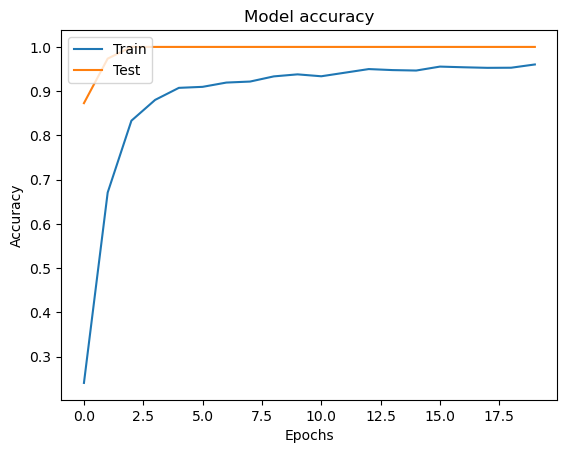

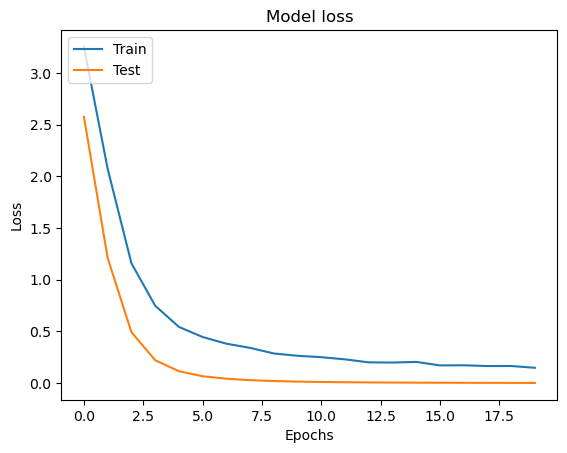

In [175]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

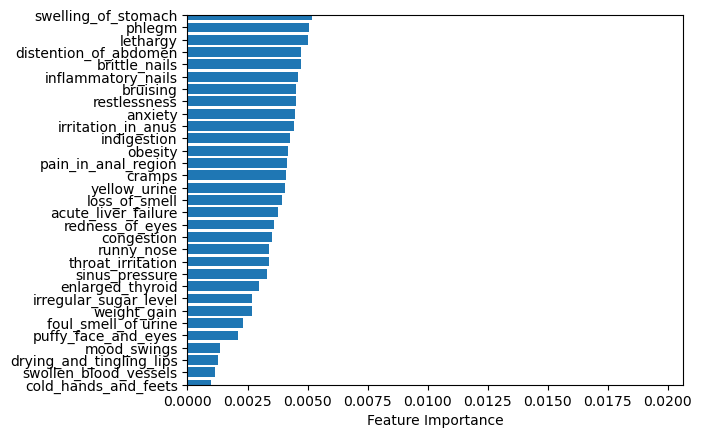

In [176]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier as an alternative model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Display the feature importances
sorted_idx = np.argsort(importances)
plt.barh(range(X_train.shape[1]), importances[sorted_idx], align='center')
plt.yticks(range(X_train.shape[1]), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylim(bottom = 0, top = 30)
plt.show()

# Features with low importance are "useless"

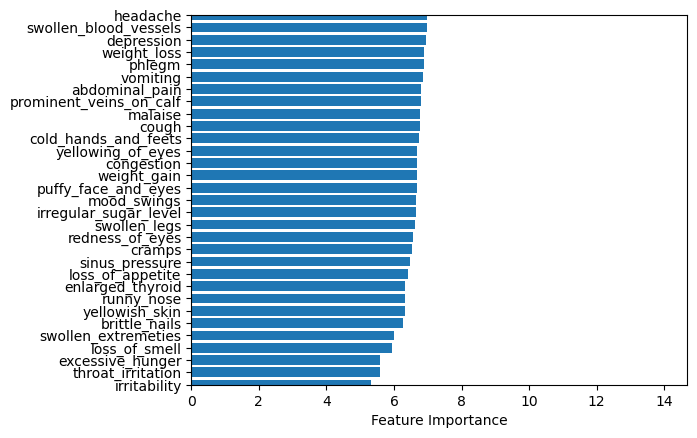

In [177]:
# Access the weights of the first layer
weights = model.layers[0].get_weights()[0]  # Weights of the first Dense layer

# Get the magnitude of the weights
feature_importance = np.abs(weights).sum(axis=1)

# Sort the features by importance
sorted_idx = np.argsort(feature_importance)

# Plot feature importance
plt.barh(range(X_train.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X_train.shape[1]), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylim(bottom = 0, top = 30)
plt.show()